In [4]:
import pandas as pd
import numpy as np

#### Importing the Data

In [5]:
path_demo = 'C:/Users/Setareh Erfani/Desktop/Respiratory_Sound_Database/demographic_info.txt'

In [6]:
df_demo = pd.read_csv('C:/Users/Setareh Erfani/Desktop/Respiratory_Sound_Database/demographic_info.txt', names = ['Patient number', 'Age', 'Sex' , 'Adult BMI (kg/m2)', 'Child Weight (kg)' , 'Child Height (cm)'],
                             delimiter = ' ')
df_demo.head()

,Patient number,Age,Sex,Adult BMI (kg/m2),Child Weight (kg),Child Height (cm)
0,101,3.00,F,NaN,19.0,99.0
1,102,0.75,F,NaN,9.8,73.0
2,103,70.00,F,33.00,NaN,NaN
3,104,70.00,F,28.47,NaN,NaN
4,105,7.00,F,NaN,32.0,135.0


In [7]:
path_diag = 'C:/Users/Setareh Erfani/Desktop/Respiratory_Sound_Database/patient_diagnosis.csv'
df_diag = pd.read_csv(path_diag, names = ['Patient number', 'Diagnosis'])
df_diag.head()

,Patient number,Diagnosis
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


In [8]:
df =  df_demo.join(df_diag.set_index('Patient number'), on = 'Patient number', how = 'left')
df.head()

,Patient number,Age,Sex,Adult BMI (kg/m2),Child Weight (kg),Child Height (cm),Diagnosis
0,101,3.00,F,NaN,19.0,99.0,URTI
1,102,0.75,F,NaN,9.8,73.0,Healthy
2,103,70.00,F,33.00,NaN,NaN,Asthma
3,104,70.00,F,28.47,NaN,NaN,COPD
4,105,7.00,F,NaN,32.0,135.0,URTI


In [9]:
path_data = 'C:/Users/Setareh Erfani/Desktop/Respiratory_Sound_Database/audio_and_txt_files'

In [10]:
import os
from os import listdir
from os.path import isfile
from os.path import join

filenames = [f for f in listdir(path_data) if (isfile(join(path_data, f)) and f.endswith('.wav'))] 
Txt_files = [f for f in listdir(path_data) if (isfile(join(path_data, f)) and f.endswith('.txt'))]

In [9]:
def Antn_Data(file_name, root):
    tokens = file_name.split('_')
    recording_info = pd.DataFrame(data = [tokens], columns = ['Patient number', 'Recording index', 'Chest location','Acquisition mode','Recording equipment'])
    recording_annotations = pd.read_csv(os.path.join(root, file_name), names = ['Start', 'End', 'Crackles', 'Wheezes'], delimiter= '\t')
    return (recording_info, recording_annotations)

In [10]:
tst_list = []
annotations = []
annotations_dict = {}
for kk in Txt_files:
    (i,a) = Antn_Data(kk, path_data)
    tst_list.append(i)
    annotations.append(a)
    annotations_dict[kk] = a
recording_info = pd.concat(tst_list, axis = 0)
recording_info.head()

,Patient number,Recording index,Chest location,Acquisition mode,Recording equipment
0,101,1b1,Al,sc,Meditron.txt
0,101,1b1,Pr,sc,Meditron.txt
0,102,1b1,Ar,sc,Meditron.txt
0,103,2b2,Ar,mc,LittC2SE.txt
0,104,1b1,Al,sc,Litt3200.txt


In [11]:
duration_list = []
for i in range(len(annotations)):
    current = annotations[i]
    duration = current['End'] - current['Start']
    duration_list.extend(duration)

longest cycle:16.163
shortest cycle:0.20000000000000284
mean cycle:2.7005090852420994
mean+std cycle:5.045407366007572



Bad key "text.kerning_factor" on line 4 in
C:\Users\Setareh Erfani\anaconda3\envs\deeplearning\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


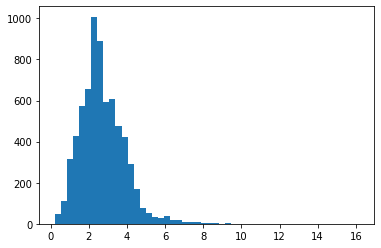

In [12]:
import matplotlib.pyplot as plt
duration_list = np.array(duration_list)
plt.hist(duration_list, bins = 50)
print('longest cycle:{}'.format(max(duration_list)))
print('shortest cycle:{}'.format(min(duration_list)))
print('mean cycle:{}'.format(np.mean(duration_list)))
print('mean+std cycle:{}'.format(np.mean(duration_list)+2*np.std(duration_list)))

In [13]:
threshold =int(np.mean(duration_list)+2*np.std(duration_list))
print('Fraction of samples less than {} seconds:{}'.format(threshold,
                                                           np.sum(duration_list < threshold)/len(duration_list)))



Fraction of samples less than 5 seconds:0.9660771238040011


In [14]:
p_id_file = [] # patient IDs corresponding to each file
for name in filenames:
    p_id_file.append(int(name[:3]))

p_id_file = np.array(p_id_file) 

p_id_cndt = {} # patient IDs corresponding to each file
for i in range(df_diag.shape[0]):
    for j in range(p_id_file.shape[0]):
        if p_id_file[j]==df_diag['Patient number'][i]:
            p_id_cndt[j]=df_diag['Diagnosis'][i]
                 
filepaths = [join(path_data, f) for f in filenames]

labels = np.array([df_diag[df_diag['Patient number'] == x]['Diagnosis'].values[0] for x in p_id_file]) # labels for audio files

In [15]:
N_Data={}
Env_data_spl={}
Row_data_spl={}
labels_new=[]
p_id_new=[]
p_cndt_new = []

len_sec=5
pcs=4

for i in range(920):

    for j in range(pcs):

        labels_new.append(labels[i])
        p_id_new.append(p_id_file[i])
        p_cndt_new.append(p_id_cndt[i])

p_id_new=np.array(p_id_new)
labels_new=np.array(labels_new)

#### Loading in the Feature Files

In [16]:
# time features
path= 'C:/Users/Setareh Erfani/Desktop/T_features_s.xlsx'
T_features_s=pd.read_excel(path)
T_features_s=T_features_s.iloc[:,1:T_features_s.shape[1]]
T_features_s=T_features_s.values



In [17]:
# frequency feautures
path='C:/Users/Setareh Erfani/Desktop/F_features_s.xlsx'
F_features_s=pd.read_excel(path)
F_features_s=F_features_s.iloc[:,1:F_features_s.shape[1]]
F_features_s=F_features_s.values

In [18]:
# sound features
path='C:/Users/Setareh Erfani/Desktop/S_features_s.xlsx'
S_features_s=pd.read_excel(path)
S_features_s=S_features_s.iloc[:,1:S_features_s.shape[1]]
S_features_s=S_features_s.values

In [19]:
# appending copd index with patient ids

COPD_idx=[] 
for idx in range(len(p_id_new)):
    if p_cndt_new[idx] == 'COPD':
        COPD_idx.append(idx)

COPD_idx=np.array(COPD_idx)

# appending healthy index with patient ids

healthy=[] 
for idx in range(len(p_id_new)):
    if p_cndt_new[idx] == 'Healthy':
        healthy.append(idx)
healthy=np.array(healthy)

# appending bronchiectasis index with patient ids

Bronchiectasis=[]      
for idx in range(len(p_id_new)):
    if p_cndt_new[idx] == 'Bronchiectasis':
        Bronchiectasis.append(idx)

Bronchiectasis=np.array(Bronchiectasis)


# appending bronchiolitis index with patient ids

Bronchiolitis=[]      
for idx in range(len(p_id_new)):
    if p_cndt_new[idx] == 'Bronchiolitis':
        Bronchiolitis.append(idx)

Bronchiolitis=np.array(Bronchiolitis)

# appending pnemonia index with patient ids

Pneumonia=[]      
for idx in range(len(p_id_new)):
    if p_cndt_new[idx] == 'Pneumonia':
        Pneumonia.append(idx)

Pneumonia=np.array(Pneumonia)

# appending lower respiratory tract infection with patient ids

LRTI=[]      
for idx in range(len(p_id_new)):
    if p_cndt_new[idx] == 'LRTI':
        LRTI.append(idx)

LRTI=np.array(LRTI)


# appending upper respiratory tract infection with patient ids

URTI=[]      
for idx in range(len(p_id_new)):
    if p_cndt_new[idx] == 'URTI':
        URTI.append(idx)

URTI=np.array(URTI)

# LSTM 3 Classes (Healthy,COPD,Pneumonia) 
## Using Time Features without feature selection

In [20]:
c_names = [ 'Healthy', 'COPD', 'Pneumonia']
num_clss = len(c_names)

In [21]:
goal_features=T_features_s
goal_labels=np.array(labels_new)
N_smpls=140
N_features=goal_features.shape[1]

[['Asthma' 'Bronchiectasis' 'Bronchiolitis' 'COPD' 'Healthy' 'LRTI'
  'Pneumonia' 'URTI']
 ['4' '64' '52' '3172' '140' '8' '148' '92']]


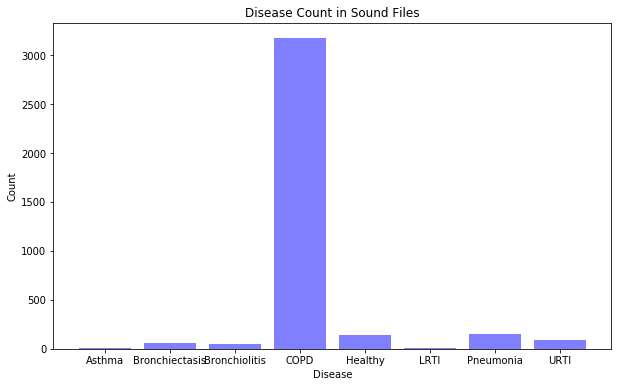

In [22]:
unique_elements, counts_elements = np.unique(labels_new, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))
#plot the quantity of conditions
y_pos = np.arange(len(unique_elements))
plt.figure(figsize=(10,6))
plt.bar(unique_elements, counts_elements, align='center', alpha=0.5,color='b')
plt.xticks(y_pos, unique_elements)
plt.ylabel('Count')
plt.xlabel('Disease')
plt.title('Disease Count in Sound Files')
plt.show()

#### Looking at the data, we can see there is a significant class imbalance. Therefore, we have to downsample the dataset in order to avoid overfitting.

In [23]:
# DownSampling
healthy_sample=goal_features[healthy,:]
healthy_sample=healthy_sample.reshape(N_smpls,N_features)
l_h=0*np.ones(healthy_sample.shape[0])


copd_ids=pd.DataFrame(COPD_idx).sample(n = N_smpls) 
copd_ids = np.array(copd_ids)
copd_sample=goal_features[copd_ids,:]
copd_sample=copd_sample.reshape(N_smpls,N_features)
c_h=np.ones(copd_sample.shape[0])

Pneumonia_ids=pd.DataFrame(Pneumonia).sample(n = N_smpls) 
Pneumonia_ids = np.array(Pneumonia_ids)
Pneumonia_sample=goal_features[Pneumonia_ids,:]
Pneumonia_sample=Pneumonia_sample.reshape(N_smpls,N_features)
pn_h=2*np.ones(Pneumonia_sample.shape[0])

In [24]:
all_feats=np.vstack((healthy_sample,copd_sample,Pneumonia_sample))
  
i_labels_n=np.hstack((l_h,c_h,pn_h))

In [25]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

le = LabelEncoder()
oh_labels = to_categorical(i_labels_n) 

Using TensorFlow backend.


In [26]:
print(np.shape(healthy_sample))
print(np.shape(copd_sample))
print(np.shape(Pneumonia_sample))
print(np.shape(all_feats))
print(np.shape(i_labels_n))

(140, 19)
(140, 19)
(140, 19)
(420, 19)
(420,)


[[  0.   1.   2.]
 [140. 140. 140.]]


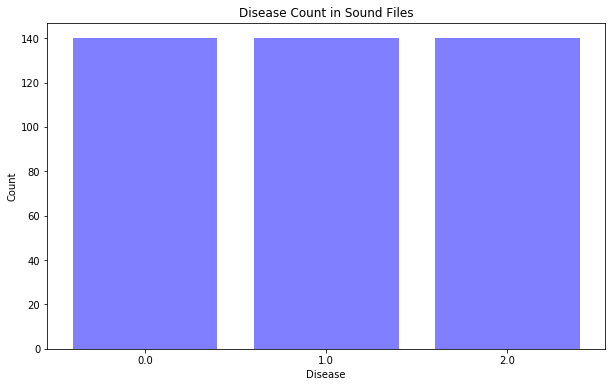

In [27]:
# Looking at the classes after downsampling
unique_elements, counts_elements = np.unique(i_labels_n, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))
#plot the quantity of conditions
y_pos = np.arange(len(unique_elements))
plt.figure(figsize=(10,6))
plt.bar(unique_elements, counts_elements, align='center', alpha=0.5,color='b')
plt.xticks(y_pos, unique_elements)
plt.ylabel('Count')
plt.xlabel('Disease')
plt.title('Disease Count in Sound Files')
plt.show()

# class 1) healthy 
# class 2) copd 
# class 3) pnemonia

#### Now all 3 classes consist of 140 samples.

In [28]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

goal_features1=all_feats
goal_features1=goal_features1.reshape(goal_features1.shape[0],1,goal_features1.shape[1])

x_train, x_test, y_train, y_test = train_test_split(goal_features1 , oh_labels, test_size=0.25, random_state=42)


data_dim = x_train.shape[2]
timesteps = x_train.shape[1]
num_clss = y_train.shape[1]


# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(128, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128))  # return a single vector of dimension 32
model.add(Dense(num_clss, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


history=model.fit(x_train, y_train,
          batch_size=64, epochs=100,
          validation_data=(x_test, y_test))






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 315 samples, validate on 105 samples
Epoch 1/100





315/315 [==============================] - 1s 4ms/step - loss: 1.0711 - acc: 0.4254 - val_loss: 1.0330 - val_acc: 0.5048
Epoch 2/100
315/315 [==============================] - 0s 54us/step - loss: 1.0160 - acc: 0.5143 - val_loss: 1.0094 - val_acc: 0.5143
Epoch 3/100
315/315 [==============================] - 0s 60us/step - loss: 0.9860 - acc: 0.5206 - val_loss: 0.9880 - val_acc: 0.5143
Epoch 4/100
315/315 [==============================] - 0s 70us/step - loss: 0.9731 - acc: 0.5365 - val_loss: 0.9928 - val_acc: 0.5143
Epoch 5/100
315/315 [==============================] - 0s 57us/step - loss: 0.9694 - acc: 0.5492 - val_loss: 0.9876 - val_acc: 0.5048
Epoch 6/100
315/315 [==============================] - 0s 57us/step - loss: 0.9540 - acc: 0.5460 - val_loss: 0.9803 - val_acc: 0.5333
Epoch 7/100
315/315 [=======================

315/315 [==============================] - 0s 57us/step - loss: 0.7965 - acc: 0.6540 - val_loss: 1.1716 - val_acc: 0.5238
Epoch 98/100
315/315 [==============================] - 0s 54us/step - loss: 0.7933 - acc: 0.6349 - val_loss: 1.1072 - val_acc: 0.5333
Epoch 99/100
315/315 [==============================] - 0s 54us/step - loss: 0.7959 - acc: 0.6317 - val_loss: 1.1373 - val_acc: 0.5333
Epoch 100/100
315/315 [==============================] - 0s 54us/step - loss: 0.7925 - acc: 0.6444 - val_loss: 1.1121 - val_acc: 0.5429


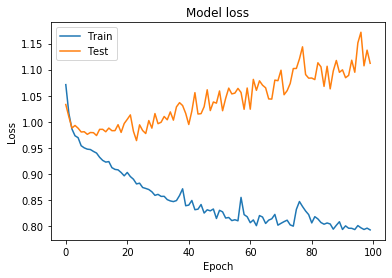

In [29]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [30]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.6603174582360283
Testing Accuracy:  0.542857145127796


In [31]:
import sklearn
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Classification Report
preds = model.predict_proba(x_test)
classpreds = np.argmax(preds, axis=1)
y_testclass = np.argmax(y_test, axis=1)

classification_results=sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names)
print(sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names))

              precision    recall  f1-score   support

     Healthy       0.73      0.59      0.65        41
        COPD       0.43      0.64      0.51        28
   Pneumonia       0.50      0.42      0.45        36

    accuracy                           0.54       105
   macro avg       0.55      0.55      0.54       105
weighted avg       0.57      0.54      0.55       105



In [32]:
print(confusion_matrix(y_testclass, classpreds))

[[24  8  9]
 [ 4 18  6]
 [ 5 16 15]]


----


# LSTM 3 Classes (Healthy, COPD,Pneumonia)
## Using Time features with feature selection

In [35]:
# feature selection using xgbregressor
def XGBRgrssr(Features,label,Train_R,B_Sc,N_Est,L_Rt):
    
    
    def get_feature_importance_data(Features,label,Train_R):
        
        y = label
        X = Features
    
        train_samples = int(X.shape[0] *Train_R)
 
        X_train = X[:train_samples]
        X_test = X[train_samples:]

        y_train = y[:train_samples]
        y_test = y[train_samples:]
    
        return (X_train, y_train), (X_test, y_test)

    (X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(Features,label,Train_R)

    regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=N_Est,base_score=B_Sc,colsample_bytree=1,learning_rate=L_Rt)

    xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                         eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                         verbose=False)
    
    eval_result = regressor.evals_result()
    training_rounds = range(len(eval_result['validation_0']['rmse']))
    plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
    plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
    plt.xlabel('Iterations')
    plt.ylabel('RMSE')
    plt.title('Training Vs Validation Error')
    plt.legend()
    plt.show()
    features_score=xgbModel.feature_importances_
    features_score=features_score/max(features_score)
    fig = plt.figure()
    plt.xticks(rotation='vertical')
    X_test_FI=pd.DataFrame(X_test_FI)
    plt.bar([i for i in range(len(xgbModel.feature_importances_))], 
             xgbModel.feature_importances_/max(xgbModel.feature_importances_), tick_label=X_test_FI.columns)
    plt.title('Feature importance')
    plt.xlabel('Feature index')
    plt.ylabel('Normalized feature Score')
    plt.grid()
    plt.show()
    feature_idx=np.zeros((len(features_score)))
    for i in range(len(features_score)):
        if features_score[i]>B_Sc:
            feature_idx[i]=i
        else:
            feature_idx[i]=0
    feature_idx=feature_idx[feature_idx>0]
    
    return features_score,feature_idx

[15:20:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


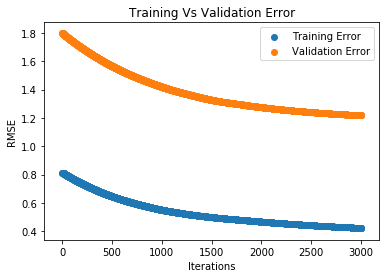

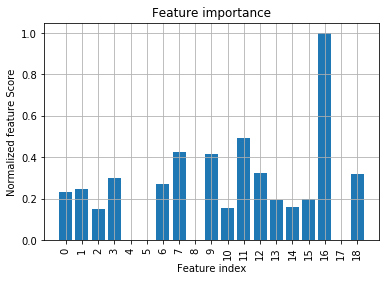

In [36]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

all_feats=np.vstack((healthy_sample,copd_sample,Pneumonia_sample))

i_labels_n=np.hstack((l_h,c_h,pn_h))

features_score,feature_idx=XGBRgrssr(all_feats,i_labels_n,.75,0.2,3000,.001)

In [37]:

all_feats=pd.DataFrame(all_feats)[feature_idx]
goal_features1=np.array(all_feats)
goal_features1=goal_features1.reshape(goal_features1.shape[0],1,goal_features1.shape[1])
le = LabelEncoder()
oh_labels = to_categorical(i_labels_n) 

x_train, x_test, y_train, y_test = train_test_split(goal_features1 , oh_labels, test_size=0.25, random_state=7)


data_dim = x_train.shape[2]
timesteps = x_train.shape[1]
num_clss = y_train.shape[1]


# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(128, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128))  # return a single vector of dimension 32
model.add(Dense(num_clss, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


history=model.fit(x_train, y_train,
          batch_size=64, epochs=100,
          validation_data=(x_test, y_test))

Train on 315 samples, validate on 105 samples
Epoch 1/100
315/315 [==============================] - 1s 4ms/step - loss: 1.0712 - acc: 0.4730 - val_loss: 1.0451 - val_acc: 0.5429
Epoch 2/100
315/315 [==============================] - 0s 57us/step - loss: 1.0016 - acc: 0.5429 - val_loss: 1.0236 - val_acc: 0.5048
Epoch 3/100
315/315 [==============================] - 0s 60us/step - loss: 0.9679 - acc: 0.5556 - val_loss: 1.0276 - val_acc: 0.5048
Epoch 4/100
315/315 [==============================] - 0s 57us/step - loss: 0.9568 - acc: 0.5365 - val_loss: 1.0209 - val_acc: 0.5143
Epoch 5/100
315/315 [==============================] - 0s 57us/step - loss: 0.9448 - acc: 0.5587 - val_loss: 1.0182 - val_acc: 0.5238
Epoch 6/100
315/315 [==============================] - 0s 57us/step - loss: 0.9348 - acc: 0.5587 - val_loss: 1.0187 - val_acc: 0.5238
Epoch 7/100
315/315 [==============================] - 0s 54us/step - loss: 0.9298 - acc: 0.5683 - val_loss: 1.0180 - val_acc: 0.5238
Epoch 8/100
315/3

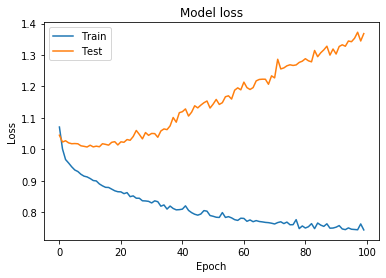

In [38]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [39]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])


Training Accuracy:  0.6730158715021043
Testing Accuracy:  0.47619047846112933


In [41]:
preds = model.predict_proba(x_test)
classpreds = np.argmax(preds, axis=1)
y_testclass = np.argmax(y_test, axis=1)

classification_results=sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names)
print(sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names))

              precision    recall  f1-score   support

     Healthy       0.58      0.41      0.48        37
        COPD       0.41      0.74      0.53        31
   Pneumonia       0.52      0.32      0.40        37

    accuracy                           0.48       105
   macro avg       0.50      0.49      0.47       105
weighted avg       0.51      0.48      0.46       105



In [42]:
print(confusion_matrix(y_testclass, classpreds))

[[15 14  8]
 [ 5 23  3]
 [ 6 19 12]]


-------

# LSTM 3 Classes (Healthy,COPD,Pneumonia) 
## Using Frequency features without feature selection

In [45]:
goal_features=F_features_s
goal_labels=np.array(labels_new)
N_smpls=140
N_features=goal_features.shape[1]

In [46]:
healthy_sample=goal_features[healthy,:]
healthy_sample=healthy_sample.reshape(N_smpls,N_features)
l_h=0*np.ones(healthy_sample.shape[0])

copd_ids=pd.DataFrame(COPD_idx).sample(n = N_smpls) 
copd_ids = np.array(copd_ids)
copd_sample=goal_features[copd_ids,:]
copd_sample=copd_sample.reshape(N_smpls,N_features)
c_h=np.ones(copd_sample.shape[0])


Pneumonia_ids=pd.DataFrame(Pneumonia).sample(n = N_smpls) 
Pneumonia_ids = np.array(Pneumonia_ids)
Pneumonia_sample=goal_features[Pneumonia_ids,:]
Pneumonia_sample=Pneumonia_sample.reshape(N_smpls,N_features)
pn_h=2*np.ones(Pneumonia_sample.shape[0])


In [47]:
all_feats=np.vstack((healthy_sample,copd_sample,Pneumonia_sample))
  
i_labels_n=np.hstack((l_h,c_h,pn_h))

In [48]:
goal_features1=all_feats
goal_features1=goal_features1.reshape(goal_features1.shape[0],1,goal_features1.shape[1])
le = LabelEncoder()
oh_labels = to_categorical(i_labels_n) 

x_train, x_test, y_train, y_test = train_test_split(goal_features1 , oh_labels, test_size=0.25, random_state=7)


data_dim = x_train.shape[2]
timesteps = x_train.shape[1]
num_clss = y_train.shape[1]


# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(128, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128))  # return a single vector of dimension 32
model.add(Dense(num_clss, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


history=model.fit(x_train, y_train,
          batch_size=64, epochs=100,
          validation_data=(x_test, y_test))


Train on 315 samples, validate on 105 samples
Epoch 1/100
315/315 [==============================] - 1s 5ms/step - loss: 1.1027 - acc: 0.3270 - val_loss: 1.1007 - val_acc: 0.2952
Epoch 2/100
315/315 [==============================] - 0s 63us/step - loss: 1.1014 - acc: 0.3460 - val_loss: 1.1000 - val_acc: 0.2952
Epoch 3/100
315/315 [==============================] - 0s 63us/step - loss: 1.0994 - acc: 0.3460 - val_loss: 1.1003 - val_acc: 0.2952
Epoch 4/100
315/315 [==============================] - 0s 70us/step - loss: 1.0993 - acc: 0.3460 - val_loss: 1.1010 - val_acc: 0.2952
Epoch 5/100
315/315 [==============================] - 0s 63us/step - loss: 1.0990 - acc: 0.3460 - val_loss: 1.1012 - val_acc: 0.2952
Epoch 6/100
315/315 [==============================] - 0s 66us/step - loss: 1.0993 - acc: 0.3460 - val_loss: 1.1009 - val_acc: 0.2952
Epoch 7/100
315/315 [==============================] - 0s 66us/step - loss: 1.0994 - acc: 0.3460 - val_loss: 1.1008 - val_acc: 0.2952
Epoch 8/100
315/3

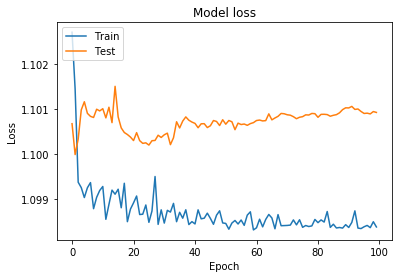

In [49]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [50]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])


Training Accuracy:  0.3460317462209671
Testing Accuracy:  0.29523809538001106


In [51]:
# Classification Report
preds = model.predict_proba(x_test)
classpreds = np.argmax(preds, axis=1)
y_testclass = np.argmax(y_test, axis=1)

classification_results=sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names)
print(sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names))

              precision    recall  f1-score   support

     Healthy       0.00      0.00      0.00        37
        COPD       0.30      1.00      0.46        31
   Pneumonia       0.00      0.00      0.00        37

    accuracy                           0.30       105
   macro avg       0.10      0.33      0.15       105
weighted avg       0.09      0.30      0.13       105



C:\Users\Setareh Erfani\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [52]:
print(confusion_matrix(y_testclass, classpreds))

[[ 0 37  0]
 [ 0 31  0]
 [ 0 37  0]]


--------

# LSTM 3 Classes(Healthy,COPD,Pneumonia)
## Using Frequency features with feature selection

In [55]:
all_feats=np.vstack((healthy_sample,copd_sample,Pneumonia_sample))

i_labels_n=np.hstack((l_h,c_h,pn_h))

[15:21:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


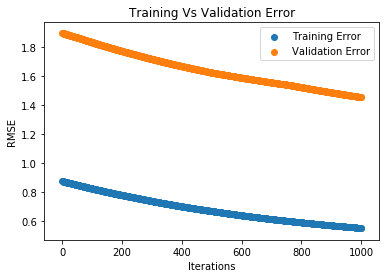

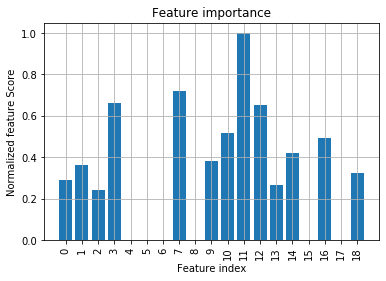

In [56]:

features_score,feature_idx=XGBRgrssr(all_feats,i_labels_n,.75,0.1,1000,.001)

In [57]:
all_feats=pd.DataFrame(all_feats)[feature_idx]
all_feats=np.array(all_feats)
goal_features1=all_feats
goal_features1=goal_features1.reshape(goal_features1.shape[0],1,goal_features1.shape[1])
le = LabelEncoder()
oh_labels = to_categorical(i_labels_n) 

x_train, x_test, y_train, y_test = train_test_split(goal_features1 , oh_labels, test_size=0.25, random_state=7)


data_dim = x_train.shape[2]
timesteps = x_train.shape[1]
num_clss = y_train.shape[1]


# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(128, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128))  # return a single vector of dimension 32
model.add(Dense(num_clss, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


history=model.fit(x_train, y_train,
          batch_size=64, epochs=100,
          validation_data=(x_test, y_test))

Train on 315 samples, validate on 105 samples
Epoch 1/100
315/315 [==============================] - 2s 6ms/step - loss: 1.0997 - acc: 0.3238 - val_loss: 1.0986 - val_acc: 0.3524
Epoch 2/100
315/315 [==============================] - 0s 70us/step - loss: 1.1016 - acc: 0.3016 - val_loss: 1.0990 - val_acc: 0.3524
Epoch 3/100
315/315 [==============================] - 0s 70us/step - loss: 1.0995 - acc: 0.3175 - val_loss: 1.0993 - val_acc: 0.2952
Epoch 4/100
315/315 [==============================] - 0s 66us/step - loss: 1.0993 - acc: 0.3397 - val_loss: 1.1005 - val_acc: 0.2952
Epoch 5/100
315/315 [==============================] - 0s 66us/step - loss: 1.0996 - acc: 0.3460 - val_loss: 1.0995 - val_acc: 0.2952
Epoch 6/100
315/315 [==============================] - 0s 66us/step - loss: 1.0999 - acc: 0.3048 - val_loss: 1.1002 - val_acc: 0.2952
Epoch 7/100
315/315 [==============================] - 0s 63us/step - loss: 1.0998 - acc: 0.3460 - val_loss: 1.1004 - val_acc: 0.2952
Epoch 8/100
315/3

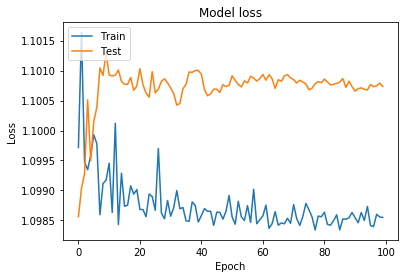

In [58]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [59]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.3460317462209671
Testing Accuracy:  0.29523809538001106


In [60]:
# Classification Report
preds = model.predict_proba(x_test)
classpreds = np.argmax(preds, axis=1)
y_testclass = np.argmax(y_test, axis=1)

classification_results=sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names)
print(sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names))

              precision    recall  f1-score   support

     Healthy       0.00      0.00      0.00        37
        COPD       0.30      1.00      0.46        31
   Pneumonia       0.00      0.00      0.00        37

    accuracy                           0.30       105
   macro avg       0.10      0.33      0.15       105
weighted avg       0.09      0.30      0.13       105



C:\Users\Setareh Erfani\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [61]:
print(confusion_matrix(y_testclass, classpreds))

[[ 0 37  0]
 [ 0 31  0]
 [ 0 37  0]]


-----

# LSTM 3 Classes (Healthy,COPD,Pneumonia)
## Using Sound Features without feature selection

In [64]:

goal_features=S_features_s
goal_labels=np.array(labels_new)
N_smpls=140
N_features=goal_features.shape[1]

In [65]:
healthy_sample=goal_features[healthy,:]
healthy_sample=healthy_sample.reshape(N_smpls,N_features)
l_h=0*np.ones(healthy_sample.shape[0])

copd_ids=pd.DataFrame(COPD_idx).sample(n = N_smpls) 
copd_ids = np.array(copd_ids)
copd_sample=goal_features[copd_ids,:]
copd_sample=copd_sample.reshape(N_smpls,N_features)
c_h=np.ones(copd_sample.shape[0])


Pneumonia_ids=pd.DataFrame(Pneumonia).sample(n = N_smpls) 
Pneumonia_ids = np.array(Pneumonia_ids)
Pneumonia_sample=goal_features[Pneumonia_ids,:]
Pneumonia_sample=Pneumonia_sample.reshape(N_smpls,N_features)
pn_h=2*np.ones(Pneumonia_sample.shape[0])

In [66]:
all_feats=np.vstack((healthy_sample,copd_sample,Pneumonia_sample))
  
i_labels_n=np.hstack((l_h,c_h,pn_h))

In [67]:

goal_features1=all_feats
goal_features1=goal_features1.reshape(goal_features1.shape[0],1,goal_features1.shape[1])
le = LabelEncoder()
oh_labels = to_categorical(i_labels_n) 

x_train, x_test, y_train, y_test = train_test_split(goal_features1 , oh_labels, test_size=0.25, random_state=7)


data_dim = x_train.shape[2]
timesteps = x_train.shape[1]
num_clss = y_train.shape[1]


# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(128, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128))  # return a single vector of dimension 32
model.add(Dense(num_clss, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


history=model.fit(x_train, y_train,
          batch_size=64, epochs=100,
          validation_data=(x_test, y_test))

Train on 315 samples, validate on 105 samples
Epoch 1/100
315/315 [==============================] - 2s 6ms/step - loss: 1.0731 - acc: 0.4952 - val_loss: 1.0055 - val_acc: 0.5524
Epoch 2/100
315/315 [==============================] - 0s 228us/step - loss: 0.9719 - acc: 0.5937 - val_loss: 0.8652 - val_acc: 0.6667
Epoch 3/100
315/315 [==============================] - 0s 234us/step - loss: 0.8399 - acc: 0.6667 - val_loss: 0.7502 - val_acc: 0.7238
Epoch 4/100
315/315 [==============================] - 0s 231us/step - loss: 0.7371 - acc: 0.6667 - val_loss: 0.7095 - val_acc: 0.6571
Epoch 5/100
315/315 [==============================] - 0s 237us/step - loss: 0.6573 - acc: 0.6984 - val_loss: 0.6667 - val_acc: 0.7143
Epoch 6/100
315/315 [==============================] - 0s 231us/step - loss: 0.6095 - acc: 0.7270 - val_loss: 0.6213 - val_acc: 0.7238
Epoch 7/100
315/315 [==============================] - 0s 241us/step - loss: 0.5765 - acc: 0.7429 - val_loss: 0.6147 - val_acc: 0.7429
Epoch 8/100

Epoch 61/100
315/315 [==============================] - 0s 218us/step - loss: 0.1067 - acc: 0.9524 - val_loss: 0.6661 - val_acc: 0.8095
Epoch 62/100
315/315 [==============================] - 0s 228us/step - loss: 0.0715 - acc: 0.9841 - val_loss: 0.5526 - val_acc: 0.8571
Epoch 63/100
315/315 [==============================] - 0s 215us/step - loss: 0.1839 - acc: 0.9365 - val_loss: 0.5789 - val_acc: 0.8190
Epoch 64/100
315/315 [==============================] - 0s 222us/step - loss: 0.0641 - acc: 0.9841 - val_loss: 0.6140 - val_acc: 0.8190
Epoch 65/100
315/315 [==============================] - 0s 215us/step - loss: 0.3473 - acc: 0.8762 - val_loss: 0.6488 - val_acc: 0.8000
Epoch 66/100
315/315 [==============================] - 0s 218us/step - loss: 0.1166 - acc: 0.9524 - val_loss: 0.5894 - val_acc: 0.8190
Epoch 67/100
315/315 [==============================] - 0s 218us/step - loss: 0.0517 - acc: 0.9873 - val_loss: 0.7574 - val_acc: 0.8190
Epoch 68/100
315/315 [==========================

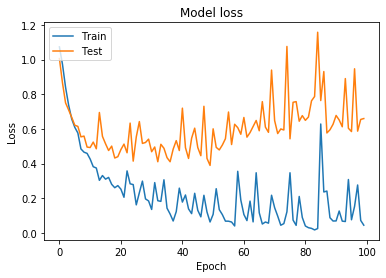

In [68]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [69]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])


Training Accuracy:  0.9904761904761905
Testing Accuracy:  0.8571428577105205


In [70]:
# Classification Report
preds = model.predict_proba(x_test)
classpreds = np.argmax(preds, axis=1)
y_testclass = np.argmax(y_test, axis=1)

classification_results=sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names)
print(sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names))

              precision    recall  f1-score   support

     Healthy       0.88      0.76      0.81        37
        COPD       0.96      0.87      0.92        31
   Pneumonia       0.78      0.95      0.85        37

    accuracy                           0.86       105
   macro avg       0.87      0.86      0.86       105
weighted avg       0.87      0.86      0.86       105



In [71]:
print(confusion_matrix(y_testclass, classpreds))

[[28  1  8]
 [ 2 27  2]
 [ 2  0 35]]


In [73]:
AUc=[]
for i in range(num_clss):
    AUc.append(sklearn.metrics.auc(fpr[i], tpr[i]))

print(AUc)
print(np.mean(AUc))

[0.9117647058823529, 0.9542284219703574, 0.9463434022257552]
0.9374455100261551


-----

# LSTM 3 Classes (Healthy, COPD,Pneumonia)
## Using Sound Features with feature selection

In [74]:
all_feats=np.vstack((healthy_sample,copd_sample,Pneumonia_sample))
  
i_labels_n=np.hstack((l_h,c_h,pn_h))

[15:23:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


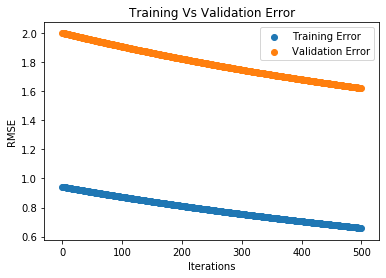

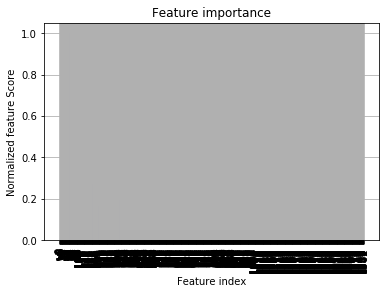

In [75]:
features_score,feature_idx=XGBRgrssr(all_feats,i_labels_n,.75,0,500,.001)

In [76]:
all_feats=pd.DataFrame(all_feats)[feature_idx]
all_feats=np.array(all_feats)
goal_features1=all_feats
goal_features1=goal_features1.reshape(goal_features1.shape[0],1,goal_features1.shape[1])
le = LabelEncoder()
oh_labels = to_categorical(i_labels_n) 

x_train, x_test, y_train, y_test = train_test_split(goal_features1 , oh_labels, test_size=0.25, random_state=7)


data_dim = x_train.shape[2]
timesteps = x_train.shape[1]
num_clss = y_train.shape[1]


# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(128, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128))  # return a single vector of dimension 32
model.add(Dense(num_clss, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


history=model.fit(x_train, y_train,
          batch_size=64, epochs=100,
          validation_data=(x_test, y_test))

Train on 315 samples, validate on 105 samples
Epoch 1/100
315/315 [==============================] - 2s 7ms/step - loss: 1.0553 - acc: 0.5016 - val_loss: 0.9548 - val_acc: 0.6857
Epoch 2/100
315/315 [==============================] - 0s 89us/step - loss: 0.9005 - acc: 0.5746 - val_loss: 0.8230 - val_acc: 0.7429
Epoch 3/100
315/315 [==============================] - 0s 89us/step - loss: 0.7942 - acc: 0.6921 - val_loss: 0.7656 - val_acc: 0.7143
Epoch 4/100
315/315 [==============================] - 0s 82us/step - loss: 0.7214 - acc: 0.6889 - val_loss: 0.7149 - val_acc: 0.6857
Epoch 5/100
315/315 [==============================] - 0s 89us/step - loss: 0.6616 - acc: 0.7365 - val_loss: 0.6521 - val_acc: 0.7714
Epoch 6/100
315/315 [==============================] - 0s 92us/step - loss: 0.6334 - acc: 0.7048 - val_loss: 0.6439 - val_acc: 0.7905
Epoch 7/100
315/315 [==============================] - 0s 89us/step - loss: 0.5796 - acc: 0.7587 - val_loss: 0.6171 - val_acc: 0.8000
Epoch 8/100
315/3

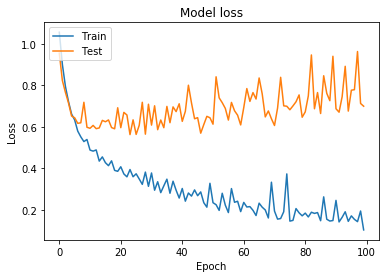

In [77]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [78]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9746031746031746
Testing Accuracy:  0.7904761910438538


In [79]:
# Classification Report
preds = model.predict_proba(x_test)
classpreds = np.argmax(preds, axis=1)
y_testclass = np.argmax(y_test, axis=1)

classification_results=sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names)
print(sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names))

              precision    recall  f1-score   support

     Healthy       0.78      0.84      0.81        37
        COPD       0.89      0.81      0.85        31
   Pneumonia       0.73      0.73      0.73        37

    accuracy                           0.79       105
   macro avg       0.80      0.79      0.79       105
weighted avg       0.79      0.79      0.79       105



In [80]:
print(confusion_matrix(y_testclass, classpreds))

[[31  2  4]
 [ 0 25  6]
 [ 9  1 27]]


------

# LSTM 5 Classes (Healthy,COPD,Pneumonia,Bronchiectasis,URTI)
## Using Time Features without feature selection

In [83]:
goal_features=T_features_s
goal_labels=np.array(labels_new)

In [84]:
c_names = [ 'Bronchiectasis', 'COPD', 'Healthy' ,'Pneumonia', 'URTI']
num_clss = len(c_names)

N_smpls=60
N_features=goal_features.shape[1]

In [85]:
Bronchiectasis_ids=pd.DataFrame(Bronchiectasis).sample(n = N_smpls) 
Bronchiectasis_ids = np.array(Bronchiectasis_ids)
Bronchiectasis_sample=goal_features[Bronchiectasis_ids,:]
Bronchiectasis_sample=Bronchiectasis_sample.reshape(N_smpls,N_features)
BR_h=0*np.ones(Bronchiectasis_sample.shape[0])


copd_ids=pd.DataFrame(COPD_idx).sample(n = N_smpls) 
copd_ids = np.array(copd_ids)
copd_sample=goal_features[copd_ids,:]
copd_sample=copd_sample.reshape(N_smpls,N_features)
c_h=np.ones(copd_sample.shape[0])

healthy_ids=pd.DataFrame(healthy).sample(n = N_smpls) 
healthy_ids = np.array(healthy_ids)
healthy_sample=goal_features[healthy_ids,:]
healthy_sample=healthy_sample.reshape(N_smpls,N_features)
l_h=2*np.ones(healthy_sample.shape[0])


Pneumonia_ids=pd.DataFrame(Pneumonia).sample(n = N_smpls) 
Pneumonia_ids = np.array(Pneumonia_ids)
Pneumonia_sample=goal_features[Pneumonia_ids,:]
Pneumonia_sample=Pneumonia_sample.reshape(N_smpls,N_features)
pn_h=3*np.ones(Pneumonia_sample.shape[0])

URTI_ids=pd.DataFrame(URTI).sample(n = N_smpls) 
URTI_ids = np.array(URTI_ids)
URTI_sample=goal_features[URTI_ids,:]
URTI_sample=URTI_sample.reshape(N_smpls,N_features)
URTI_h=4*np.ones(URTI_sample.shape[0])

In [86]:
all_feats=np.vstack((Bronchiectasis_sample,copd_sample,healthy_sample,Pneumonia_sample,URTI_sample))
np.shape(all_feats)  
i_labels_n=np.hstack((BR_h,c_h,l_h,pn_h,URTI_h))

[[ 0.  1.  2.  3.  4.]
 [60. 60. 60. 60. 60.]]


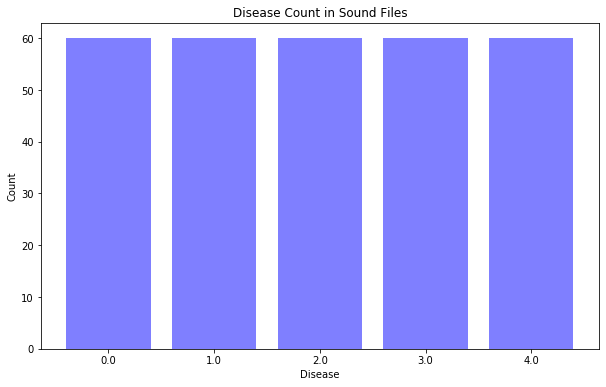

In [87]:
unique_elements, counts_elements = np.unique(i_labels_n, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))
#plot the quantity of conditions
y_pos = np.arange(len(unique_elements))
plt.figure(figsize=(10,6))
plt.bar(unique_elements, counts_elements, align='center', alpha=0.5,color='b')
plt.xticks(y_pos, unique_elements)
plt.ylabel('Count')
plt.xlabel('Disease')
plt.title('Disease Count in Sound Files')
plt.show()

In [88]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import sklearn

goal_features1=all_feats
goal_features1=goal_features1.reshape(goal_features1.shape[0],1,goal_features1.shape[1])
le = LabelEncoder()
oh_labels = to_categorical(i_labels_n) 

x_train, x_test, y_train, y_test = train_test_split(goal_features1 , oh_labels, test_size=0.25, random_state=7)


data_dim = x_train.shape[2]
timesteps = x_train.shape[1]
num_clss = y_train.shape[1]


# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(128, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128))  # return a single vector of dimension 32
model.add(Dense(num_clss, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


history=model.fit(x_train, y_train,
          batch_size=64, epochs=100,
          validation_data=(x_test, y_test))

Train on 225 samples, validate on 75 samples
Epoch 1/100
225/225 [==============================] - 2s 11ms/step - loss: 1.5725 - acc: 0.4178 - val_loss: 1.5764 - val_acc: 0.2133
Epoch 2/100
225/225 [==============================] - 0s 120us/step - loss: 1.4500 - acc: 0.4533 - val_loss: 1.5709 - val_acc: 0.2133
Epoch 3/100
225/225 [==============================] - 0s 115us/step - loss: 1.3385 - acc: 0.4533 - val_loss: 1.5881 - val_acc: 0.2267
Epoch 4/100
225/225 [==============================] - 0s 120us/step - loss: 1.2773 - acc: 0.4533 - val_loss: 1.6058 - val_acc: 0.2133
Epoch 5/100
225/225 [==============================] - 0s 115us/step - loss: 1.2408 - acc: 0.4622 - val_loss: 1.6031 - val_acc: 0.2267
Epoch 6/100
225/225 [==============================] - 0s 115us/step - loss: 1.2131 - acc: 0.4889 - val_loss: 1.6015 - val_acc: 0.2400
Epoch 7/100
225/225 [==============================] - 0s 115us/step - loss: 1.1834 - acc: 0.4978 - val_loss: 1.5602 - val_acc: 0.3067
Epoch 8/100

Epoch 61/100
225/225 [==============================] - 0s 124us/step - loss: 0.9386 - acc: 0.5733 - val_loss: 1.7969 - val_acc: 0.2267
Epoch 62/100
225/225 [==============================] - 0s 124us/step - loss: 0.9316 - acc: 0.5556 - val_loss: 1.8137 - val_acc: 0.2400
Epoch 63/100
225/225 [==============================] - 0s 129us/step - loss: 0.9298 - acc: 0.5911 - val_loss: 1.7852 - val_acc: 0.3467
Epoch 64/100
225/225 [==============================] - 0s 129us/step - loss: 0.9381 - acc: 0.5778 - val_loss: 1.7639 - val_acc: 0.2400
Epoch 65/100
225/225 [==============================] - 0s 129us/step - loss: 0.9266 - acc: 0.5822 - val_loss: 1.8252 - val_acc: 0.2267
Epoch 66/100
225/225 [==============================] - 0s 120us/step - loss: 0.9303 - acc: 0.5644 - val_loss: 1.8448 - val_acc: 0.2533
Epoch 67/100
225/225 [==============================] - 0s 115us/step - loss: 0.9333 - acc: 0.5511 - val_loss: 1.7853 - val_acc: 0.2400
Epoch 68/100
225/225 [==========================

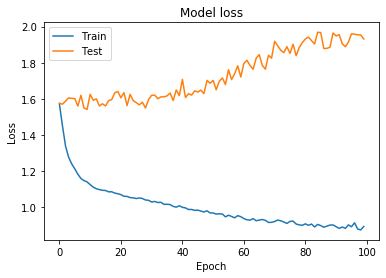

In [89]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [90]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.6044444444444445
Testing Accuracy:  0.3600000015894572


In [91]:
# Classification Report
preds = model.predict_proba(x_test)
classpreds = np.argmax(preds, axis=1)
y_testclass = np.argmax(y_test, axis=1)

classification_results=sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names)
print(sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names))

                precision    recall  f1-score   support

Bronchiectasis       0.45      0.62      0.53         8
          COPD       0.41      0.67      0.51        21
       Healthy       0.29      0.13      0.18        15
     Pneumonia       0.50      0.18      0.27        11
          URTI       0.21      0.20      0.21        20

      accuracy                           0.36        75
     macro avg       0.37      0.36      0.34        75
  weighted avg       0.35      0.36      0.33        75



In [92]:
print(confusion_matrix(y_testclass, classpreds))

[[ 5  0  0  0  3]
 [ 1 14  1  1  4]
 [ 1  6  2  0  6]
 [ 0  7  0  2  2]
 [ 4  7  4  1  4]]


-----

# LSTM 5 Classes (Healthy,COPD,Pneumonia,Bronchiectasis,URTI)
## Using Time Features with feature selection

In [95]:
all_feats=np.vstack((Bronchiectasis_sample,copd_sample,healthy_sample,Pneumonia_sample,URTI_sample))
np.shape(all_feats)  
i_labels_n=np.hstack((BR_h,c_h,l_h,pn_h,URTI_h))

[15:24:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


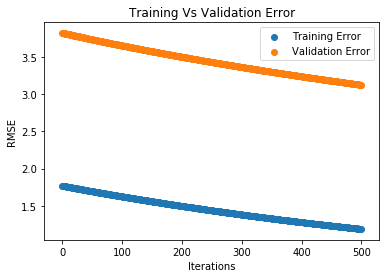

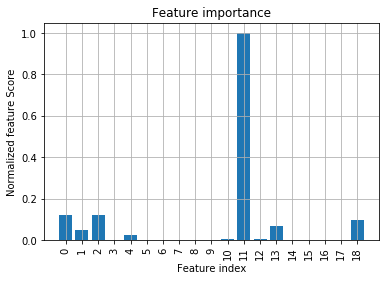

In [96]:
features_score,feature_idx=XGBRgrssr(all_feats,i_labels_n,.75,0,500,.001)

In [97]:
all_feats=pd.DataFrame(all_feats)[feature_idx]
all_feats=np.array(all_feats)
goal_features1=all_feats
goal_features1=goal_features1.reshape(goal_features1.shape[0],1,goal_features1.shape[1])
le = LabelEncoder()
oh_labels = to_categorical(i_labels_n) 

x_train, x_test, y_train, y_test = train_test_split(goal_features1 , oh_labels, test_size=0.25, random_state=7)


data_dim = x_train.shape[2]
timesteps = x_train.shape[1]
num_clss = y_train.shape[1]


# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(128, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128))  # return a single vector of dimension 32
model.add(Dense(num_clss, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


history=model.fit(x_train, y_train,
          batch_size=64, epochs=100,
          validation_data=(x_test, y_test))

Train on 225 samples, validate on 75 samples
Epoch 1/100
225/225 [==============================] - 3s 11ms/step - loss: 1.5838 - acc: 0.3556 - val_loss: 1.5947 - val_acc: 0.2133
Epoch 2/100
225/225 [==============================] - 0s 142us/step - loss: 1.4792 - acc: 0.4356 - val_loss: 1.5861 - val_acc: 0.2000
Epoch 3/100
225/225 [==============================] - 0s 137us/step - loss: 1.3719 - acc: 0.4578 - val_loss: 1.6266 - val_acc: 0.2000
Epoch 4/100
225/225 [==============================] - 0s 129us/step - loss: 1.3139 - acc: 0.4533 - val_loss: 1.6717 - val_acc: 0.2133
Epoch 5/100
225/225 [==============================] - 0s 129us/step - loss: 1.2879 - acc: 0.4578 - val_loss: 1.6314 - val_acc: 0.2133
Epoch 6/100
225/225 [==============================] - 0s 129us/step - loss: 1.2694 - acc: 0.4533 - val_loss: 1.6254 - val_acc: 0.2133
Epoch 7/100
225/225 [==============================] - 0s 129us/step - loss: 1.2531 - acc: 0.4711 - val_loss: 1.6828 - val_acc: 0.2267
Epoch 8/100

Epoch 61/100
225/225 [==============================] - 0s 133us/step - loss: 0.9818 - acc: 0.5911 - val_loss: 1.8325 - val_acc: 0.2933
Epoch 62/100
225/225 [==============================] - 0s 137us/step - loss: 0.9716 - acc: 0.5644 - val_loss: 1.8761 - val_acc: 0.2400
Epoch 63/100
225/225 [==============================] - 0s 129us/step - loss: 0.9725 - acc: 0.5644 - val_loss: 1.9237 - val_acc: 0.2533
Epoch 64/100
225/225 [==============================] - 0s 124us/step - loss: 0.9731 - acc: 0.5733 - val_loss: 1.9460 - val_acc: 0.2267
Epoch 65/100
225/225 [==============================] - 0s 129us/step - loss: 0.9633 - acc: 0.5600 - val_loss: 1.9156 - val_acc: 0.2400
Epoch 66/100
225/225 [==============================] - 0s 133us/step - loss: 0.9634 - acc: 0.5778 - val_loss: 1.9409 - val_acc: 0.2267
Epoch 67/100
225/225 [==============================] - 0s 133us/step - loss: 0.9664 - acc: 0.5644 - val_loss: 1.8685 - val_acc: 0.2400
Epoch 68/100
225/225 [==========================

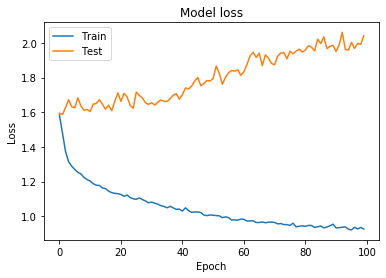

In [98]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [99]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.5955555555555555
Testing Accuracy:  0.22666666746139527


In [100]:
# Classification Report
preds = model.predict_proba(x_test)
classpreds = np.argmax(preds, axis=1)
y_testclass = np.argmax(y_test, axis=1)

classification_results=sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names)
print(sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names))

                precision    recall  f1-score   support

Bronchiectasis       0.24      0.62      0.34         8
          COPD       0.14      0.05      0.07        21
       Healthy       0.33      0.33      0.33        15
     Pneumonia       0.20      0.36      0.26        11
          URTI       0.17      0.10      0.12        20

      accuracy                           0.23        75
     macro avg       0.22      0.29      0.23        75
  weighted avg       0.21      0.23      0.19        75



In [101]:
print(confusion_matrix(y_testclass, classpreds))

[[5 0 0 0 3]
 [5 1 3 9 3]
 [4 1 5 3 2]
 [1 3 1 4 2]
 [6 2 6 4 2]]


----------

# LSTM 5 Classes (Healthy,COPD,Pneumonia,Bronchiectasis,URTI)
## Using Frequency features without feature selection

In [104]:
goal_features=F_features_s
goal_labels=np.array(labels_new)
N_smpls=60
N_features=goal_features.shape[1]

In [105]:
Bronchiectasis_ids=pd.DataFrame(Bronchiectasis).sample(n = N_smpls) 
Bronchiectasis_ids = np.array(Bronchiectasis_ids)
Bronchiectasis_sample=goal_features[Bronchiectasis_ids,:]
Bronchiectasis_sample=Bronchiectasis_sample.reshape(N_smpls,N_features)
BR_h=0*np.ones(Bronchiectasis_sample.shape[0])


copd_ids=pd.DataFrame(COPD_idx).sample(n = N_smpls) 
copd_ids = np.array(copd_ids)
copd_sample=goal_features[copd_ids,:]
copd_sample=copd_sample.reshape(N_smpls,N_features)
c_h=np.ones(copd_sample.shape[0])

healthy_ids=pd.DataFrame(healthy).sample(n = N_smpls) 
healthy_ids = np.array(healthy_ids)
healthy_sample=goal_features[healthy_ids,:]
healthy_sample=healthy_sample.reshape(N_smpls,N_features)
l_h=2*np.ones(healthy_sample.shape[0])


Pneumonia_ids=pd.DataFrame(Pneumonia).sample(n = N_smpls) 
Pneumonia_ids = np.array(Pneumonia_ids)
Pneumonia_sample=goal_features[Pneumonia_ids,:]
Pneumonia_sample=Pneumonia_sample.reshape(N_smpls,N_features)
pn_h=3*np.ones(Pneumonia_sample.shape[0])

URTI_ids=pd.DataFrame(URTI).sample(n = N_smpls) 
URTI_ids = np.array(URTI_ids)
URTI_sample=goal_features[URTI_ids,:]
URTI_sample=URTI_sample.reshape(N_smpls,N_features)
URTI_h=4*np.ones(URTI_sample.shape[0])

In [106]:
x_train, x_test, y_train, y_test = train_test_split(goal_features1 , oh_labels, test_size=0.25, random_state=7)


data_dim = x_train.shape[2]
timesteps = x_train.shape[1]
num_clss = y_train.shape[1]


# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(128, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128))  # return a single vector of dimension 32
model.add(Dense(num_clss, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


history=model.fit(x_train, y_train,
          batch_size=64, epochs=100,
          validation_data=(x_test, y_test))

Train on 225 samples, validate on 75 samples
Epoch 1/100
225/225 [==============================] - 3s 13ms/step - loss: 1.5717 - acc: 0.3822 - val_loss: 1.5774 - val_acc: 0.2267
Epoch 2/100
225/225 [==============================] - 0s 151us/step - loss: 1.4515 - acc: 0.4356 - val_loss: 1.5858 - val_acc: 0.2133
Epoch 3/100
225/225 [==============================] - 0s 142us/step - loss: 1.3435 - acc: 0.4622 - val_loss: 1.6267 - val_acc: 0.2267
Epoch 4/100
225/225 [==============================] - 0s 142us/step - loss: 1.3005 - acc: 0.4533 - val_loss: 1.6295 - val_acc: 0.2267
Epoch 5/100
225/225 [==============================] - 0s 142us/step - loss: 1.2867 - acc: 0.4533 - val_loss: 1.6139 - val_acc: 0.2267
Epoch 6/100
225/225 [==============================] - 0s 146us/step - loss: 1.2710 - acc: 0.4667 - val_loss: 1.6091 - val_acc: 0.2267
Epoch 7/100
225/225 [==============================] - 0s 137us/step - loss: 1.2560 - acc: 0.4711 - val_loss: 1.6144 - val_acc: 0.2267
Epoch 8/100

Epoch 61/100
225/225 [==============================] - 0s 146us/step - loss: 1.0190 - acc: 0.5200 - val_loss: 1.9033 - val_acc: 0.2533
Epoch 62/100
225/225 [==============================] - 0s 142us/step - loss: 1.0328 - acc: 0.5333 - val_loss: 1.8050 - val_acc: 0.2667
Epoch 63/100
225/225 [==============================] - 0s 146us/step - loss: 1.0187 - acc: 0.5289 - val_loss: 1.8372 - val_acc: 0.3333
Epoch 64/100
225/225 [==============================] - 0s 142us/step - loss: 1.0164 - acc: 0.5333 - val_loss: 1.8406 - val_acc: 0.2933
Epoch 65/100
225/225 [==============================] - 0s 146us/step - loss: 1.0158 - acc: 0.5289 - val_loss: 1.8469 - val_acc: 0.2800
Epoch 66/100
225/225 [==============================] - 0s 142us/step - loss: 1.0135 - acc: 0.5156 - val_loss: 1.8562 - val_acc: 0.2533
Epoch 67/100
225/225 [==============================] - 0s 146us/step - loss: 1.0120 - acc: 0.5422 - val_loss: 1.9506 - val_acc: 0.3067
Epoch 68/100
225/225 [==========================

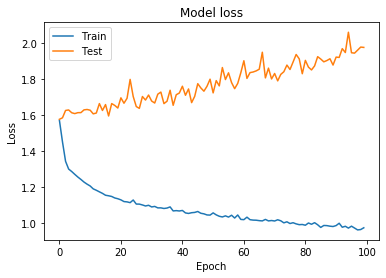

In [107]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [108]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.5733333333333334
Testing Accuracy:  0.26666666666666666


In [109]:
# Classification Report
preds = model.predict_proba(x_test)
classpreds = np.argmax(preds, axis=1)
y_testclass = np.argmax(y_test, axis=1)

classification_results=sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names)
print(sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names))

                precision    recall  f1-score   support

Bronchiectasis       0.31      0.62      0.42         8
          COPD       0.00      0.00      0.00        21
       Healthy       0.25      0.40      0.31        15
     Pneumonia       0.31      0.73      0.43        11
          URTI       0.11      0.05      0.07        20

      accuracy                           0.27        75
     macro avg       0.20      0.36      0.25        75
  weighted avg       0.16      0.27      0.19        75



C:\Users\Setareh Erfani\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [110]:
print(confusion_matrix(y_testclass, classpreds))

[[ 5  0  3  0  0]
 [ 4  0  4 10  3]
 [ 2  0  6  3  4]
 [ 0  0  2  8  1]
 [ 5  0  9  5  1]]


-----

# LSTM 5 Classes (Healthy,COPD,Pneumonia,Bronchiectasis,URTI)
## Using Frequency Features with feature selection

In [113]:
all_feats=np.vstack((Bronchiectasis_sample,copd_sample,healthy_sample,Pneumonia_sample,URTI_sample))
np.shape(all_feats)  
i_labels_n=np.hstack((BR_h,c_h,l_h,pn_h,URTI_h))

[15:26:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


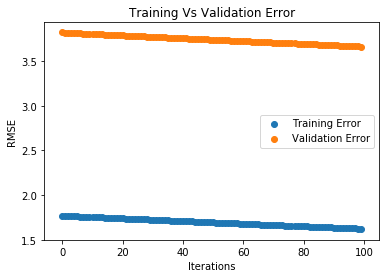

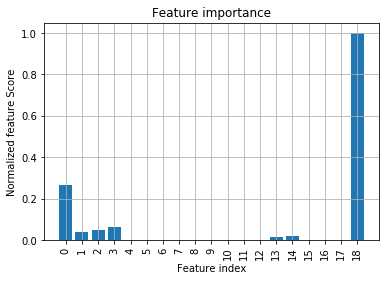

In [114]:
features_score,feature_idx=XGBRgrssr(all_feats,i_labels_n,.75,0,100,.001)

In [115]:
all_feats=pd.DataFrame(all_feats)[feature_idx]
all_feats=np.array(all_feats)
goal_features1=all_feats
goal_features1=goal_features1.reshape(goal_features1.shape[0],1,goal_features1.shape[1])
le = LabelEncoder()
oh_labels = to_categorical(i_labels_n) 

x_train, x_test, y_train, y_test = train_test_split(goal_features1 , oh_labels, test_size=0.25, random_state=7)


data_dim = x_train.shape[2]
timesteps = x_train.shape[1]
num_clss = y_train.shape[1]


# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(128, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128))  # return a single vector of dimension 32
model.add(Dense(num_clss, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


history=model.fit(x_train, y_train,
          batch_size=64, epochs=100,
          validation_data=(x_test, y_test))

Train on 225 samples, validate on 75 samples
Epoch 1/100
225/225 [==============================] - 3s 14ms/step - loss: 1.6071 - acc: 0.2222 - val_loss: 1.6142 - val_acc: 0.2000
Epoch 2/100
225/225 [==============================] - 0s 155us/step - loss: 1.5972 - acc: 0.3644 - val_loss: 1.6094 - val_acc: 0.2133
Epoch 3/100
225/225 [==============================] - 0s 155us/step - loss: 1.5757 - acc: 0.3644 - val_loss: 1.5960 - val_acc: 0.2133
Epoch 4/100
225/225 [==============================] - 0s 155us/step - loss: 1.5425 - acc: 0.3511 - val_loss: 1.5686 - val_acc: 0.2267
Epoch 5/100
225/225 [==============================] - 0s 151us/step - loss: 1.4937 - acc: 0.4044 - val_loss: 1.5453 - val_acc: 0.2400
Epoch 6/100
225/225 [==============================] - 0s 155us/step - loss: 1.4429 - acc: 0.4133 - val_loss: 1.5263 - val_acc: 0.2267
Epoch 7/100
225/225 [==============================] - 0s 151us/step - loss: 1.4100 - acc: 0.3956 - val_loss: 1.5129 - val_acc: 0.2400
Epoch 8/100

Epoch 61/100
225/225 [==============================] - 0s 151us/step - loss: 1.3066 - acc: 0.4444 - val_loss: 1.3952 - val_acc: 0.3333
Epoch 62/100
225/225 [==============================] - 0s 151us/step - loss: 1.3087 - acc: 0.4178 - val_loss: 1.4033 - val_acc: 0.3333
Epoch 63/100
225/225 [==============================] - 0s 160us/step - loss: 1.3150 - acc: 0.4133 - val_loss: 1.4033 - val_acc: 0.3200
Epoch 64/100
225/225 [==============================] - 0s 151us/step - loss: 1.3151 - acc: 0.4489 - val_loss: 1.4039 - val_acc: 0.2800
Epoch 65/100
225/225 [==============================] - 0s 151us/step - loss: 1.3069 - acc: 0.4444 - val_loss: 1.4011 - val_acc: 0.3333
Epoch 66/100
225/225 [==============================] - 0s 151us/step - loss: 1.3061 - acc: 0.4222 - val_loss: 1.4028 - val_acc: 0.3067
Epoch 67/100
225/225 [==============================] - 0s 146us/step - loss: 1.3111 - acc: 0.4133 - val_loss: 1.4021 - val_acc: 0.2800
Epoch 68/100
225/225 [==========================

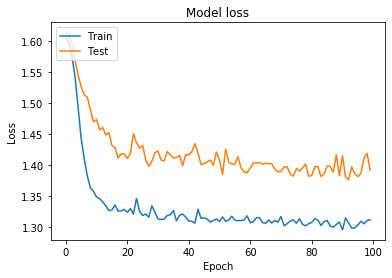

In [116]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [117]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.4222222222222222
Testing Accuracy:  0.3200000007947286


In [118]:
# Classification Report
preds = model.predict_proba(x_test)
classpreds = np.argmax(preds, axis=1)
y_testclass = np.argmax(y_test, axis=1)

classification_results=sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names)
print(sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names))

                precision    recall  f1-score   support

Bronchiectasis       0.26      0.88      0.40         8
          COPD       0.00      0.00      0.00        21
       Healthy       0.33      0.53      0.41        15
     Pneumonia       0.38      0.82      0.51        11
          URTI       0.00      0.00      0.00        20

      accuracy                           0.32        75
     macro avg       0.19      0.45      0.26        75
  weighted avg       0.15      0.32      0.20        75



C:\Users\Setareh Erfani\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [119]:
print(confusion_matrix(y_testclass, classpreds))

[[ 7  0  1  0  0]
 [12  0  8  1  0]
 [ 1  0  8  6  0]
 [ 1  0  1  9  0]
 [ 6  0  6  8  0]]


-----

# LSTM 5 Classes (Healthy,COPD,Pneumonia,Bronchiectasis,URTI)
## Using Sound Features without feature selection

In [122]:
goal_features=S_features_s
goal_labels=np.array(labels_new)
N_features=goal_features.shape[1]
print(N_features)

1563


In [123]:
Bronchiectasis_ids=pd.DataFrame(Bronchiectasis).sample(n = N_smpls) 
Bronchiectasis_ids = np.array(Bronchiectasis_ids)
Bronchiectasis_sample=goal_features[Bronchiectasis_ids,:]
Bronchiectasis_sample=Bronchiectasis_sample.reshape(N_smpls,N_features)
BR_h=0*np.ones(Bronchiectasis_sample.shape[0])


copd_ids=pd.DataFrame(COPD_idx).sample(n = N_smpls) 
copd_ids = np.array(copd_ids)
copd_sample=goal_features[copd_ids,:]
copd_sample=copd_sample.reshape(N_smpls,N_features)
c_h=np.ones(copd_sample.shape[0])

healthy_ids=pd.DataFrame(healthy).sample(n = N_smpls) 
healthy_ids = np.array(healthy_ids)
healthy_sample=goal_features[healthy_ids,:]
healthy_sample=healthy_sample.reshape(N_smpls,N_features)
l_h=2*np.ones(healthy_sample.shape[0])


Pneumonia_ids=pd.DataFrame(Pneumonia).sample(n = N_smpls) 
Pneumonia_ids = np.array(Pneumonia_ids)
Pneumonia_sample=goal_features[Pneumonia_ids,:]
Pneumonia_sample=Pneumonia_sample.reshape(N_smpls,N_features)
pn_h=3*np.ones(Pneumonia_sample.shape[0])

URTI_ids=pd.DataFrame(URTI).sample(n = N_smpls) 
URTI_ids = np.array(URTI_ids)
URTI_sample=goal_features[URTI_ids,:]
URTI_sample=URTI_sample.reshape(N_smpls,N_features)
URTI_h=4*np.ones(URTI_sample.shape[0])

In [124]:
all_feats=np.vstack((Bronchiectasis_sample,copd_sample,healthy_sample,Pneumonia_sample,URTI_sample))
np.shape(all_feats)  
i_labels_n=np.hstack((BR_h,c_h,l_h,pn_h,URTI_h))

In [125]:
goal_features1=all_feats
goal_features1=goal_features1.reshape(goal_features1.shape[0],1,goal_features1.shape[1])
le = LabelEncoder()
oh_labels = to_categorical(i_labels_n) 


x_train, x_test, y_train, y_test = train_test_split(goal_features1 , oh_labels, test_size=0.25, random_state=7)


data_dim = x_train.shape[2]
timesteps = x_train.shape[1]
num_clss = y_train.shape[1]


# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(128, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128))  # return a single vector of dimension 32
model.add(Dense(num_clss, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


history=model.fit(x_train, y_train,
          batch_size=64, epochs=100,
          validation_data=(x_test, y_test))

Train on 225 samples, validate on 75 samples
Epoch 1/100
225/225 [==============================] - 4s 16ms/step - loss: 1.5952 - acc: 0.3111 - val_loss: 1.5831 - val_acc: 0.3067
Epoch 2/100
225/225 [==============================] - 0s 394us/step - loss: 1.5374 - acc: 0.3778 - val_loss: 1.5234 - val_acc: 0.3333
Epoch 3/100
225/225 [==============================] - 0s 390us/step - loss: 1.4326 - acc: 0.4711 - val_loss: 1.4486 - val_acc: 0.4000
Epoch 4/100
225/225 [==============================] - 0s 399us/step - loss: 1.3309 - acc: 0.5022 - val_loss: 1.3673 - val_acc: 0.4267
Epoch 5/100
225/225 [==============================] - 0s 394us/step - loss: 1.1860 - acc: 0.5511 - val_loss: 1.3119 - val_acc: 0.4800
Epoch 6/100
225/225 [==============================] - 0s 395us/step - loss: 1.1308 - acc: 0.5733 - val_loss: 1.3044 - val_acc: 0.4933
Epoch 7/100
225/225 [==============================] - 0s 381us/step - loss: 1.0584 - acc: 0.6000 - val_loss: 1.2904 - val_acc: 0.5067
Epoch 8/100

Epoch 61/100
225/225 [==============================] - 0s 390us/step - loss: 0.1599 - acc: 0.9467 - val_loss: 1.5239 - val_acc: 0.6400
Epoch 62/100
225/225 [==============================] - 0s 381us/step - loss: 0.7003 - acc: 0.7911 - val_loss: 1.3697 - val_acc: 0.6533
Epoch 63/100
225/225 [==============================] - 0s 421us/step - loss: 0.4053 - acc: 0.8578 - val_loss: 1.3763 - val_acc: 0.6533
Epoch 64/100
225/225 [==============================] - 0s 408us/step - loss: 0.2013 - acc: 0.9422 - val_loss: 1.5129 - val_acc: 0.6533
Epoch 65/100
225/225 [==============================] - 0s 408us/step - loss: 0.1544 - acc: 0.9600 - val_loss: 1.4657 - val_acc: 0.6533
Epoch 66/100
225/225 [==============================] - 0s 412us/step - loss: 0.1568 - acc: 0.9600 - val_loss: 1.4623 - val_acc: 0.6667
Epoch 67/100
225/225 [==============================] - 0s 403us/step - loss: 0.1411 - acc: 0.9600 - val_loss: 1.5458 - val_acc: 0.6533
Epoch 68/100
225/225 [==========================

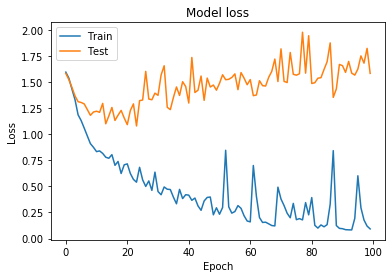

In [126]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [127]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9688888888888889
Testing Accuracy:  0.6799999984105428


In [128]:
# Classification Report
preds = model.predict_proba(x_test)
classpreds = np.argmax(preds, axis=1)
y_testclass = np.argmax(y_test, axis=1)

classification_results=sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names)
print(sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names))

                precision    recall  f1-score   support

Bronchiectasis       0.64      0.88      0.74         8
          COPD       0.82      0.86      0.84        21
       Healthy       0.56      0.67      0.61        15
     Pneumonia       0.50      0.55      0.52        11
          URTI       0.83      0.50      0.62        20

      accuracy                           0.68        75
     macro avg       0.67      0.69      0.67        75
  weighted avg       0.70      0.68      0.68        75



In [129]:
print(confusion_matrix(y_testclass, classpreds))

[[ 7  1  0  0  0]
 [ 1 18  1  1  0]
 [ 1  1 10  2  1]
 [ 0  2  2  6  1]
 [ 2  0  5  3 10]]


----


# LSTM 5 Classes (Healthy,COPD,Pneumonia,Bronchiectasis,URTI)
## Using Sound Features with feature selection

In [132]:
all_feats=np.vstack((Bronchiectasis_sample,copd_sample,healthy_sample,Pneumonia_sample,URTI_sample))
np.shape(all_feats)  
i_labels_n=np.hstack((BR_h,c_h,l_h,pn_h,URTI_h))

[15:27:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


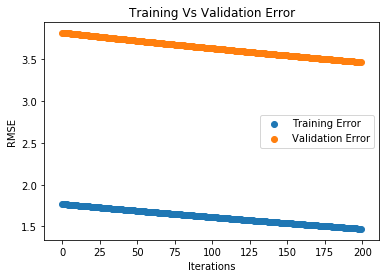

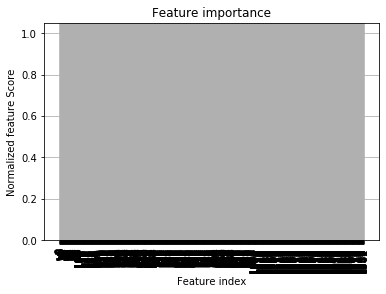

In [133]:
features_score,feature_idx=XGBRgrssr(all_feats,i_labels_n,.75,0,200,.001)

In [134]:
all_feats=pd.DataFrame(all_feats)[feature_idx]
all_feats=np.array(all_feats)
goal_features1=all_feats
goal_features1=goal_features1.reshape(goal_features1.shape[0],1,goal_features1.shape[1])
le = LabelEncoder()
oh_labels = to_categorical(i_labels_n) 

x_train, x_test, y_train, y_test = train_test_split(goal_features1 , oh_labels, test_size=0.25, random_state=7)


data_dim = x_train.shape[2]
timesteps = x_train.shape[1]
num_clss = y_train.shape[1]


# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(128, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128))  # return a single vector of dimension 32
model.add(Dense(num_clss, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


history=model.fit(x_train, y_train,
          batch_size=64, epochs=100,
          validation_data=(x_test, y_test))

Train on 225 samples, validate on 75 samples
Epoch 1/100
225/225 [==============================] - 4s 17ms/step - loss: 1.5985 - acc: 0.2889 - val_loss: 1.5536 - val_acc: 0.3067
Epoch 2/100
225/225 [==============================] - 0s 195us/step - loss: 1.5308 - acc: 0.3422 - val_loss: 1.4598 - val_acc: 0.3333
Epoch 3/100
225/225 [==============================] - 0s 182us/step - loss: 1.4646 - acc: 0.3600 - val_loss: 1.4400 - val_acc: 0.3067
Epoch 4/100
225/225 [==============================] - 0s 177us/step - loss: 1.4286 - acc: 0.3600 - val_loss: 1.4206 - val_acc: 0.3200
Epoch 5/100
225/225 [==============================] - 0s 177us/step - loss: 1.4138 - acc: 0.3556 - val_loss: 1.4134 - val_acc: 0.3467
Epoch 6/100
225/225 [==============================] - 0s 182us/step - loss: 1.3955 - acc: 0.3822 - val_loss: 1.3953 - val_acc: 0.3467
Epoch 7/100
225/225 [==============================] - 0s 186us/step - loss: 1.3771 - acc: 0.3867 - val_loss: 1.3834 - val_acc: 0.3467
Epoch 8/100

Epoch 61/100
225/225 [==============================] - 0s 182us/step - loss: 0.9395 - acc: 0.6178 - val_loss: 1.5251 - val_acc: 0.4667
Epoch 62/100
225/225 [==============================] - 0s 186us/step - loss: 0.9696 - acc: 0.5733 - val_loss: 1.4289 - val_acc: 0.4933
Epoch 63/100
225/225 [==============================] - 0s 186us/step - loss: 0.8967 - acc: 0.5911 - val_loss: 1.3792 - val_acc: 0.5600
Epoch 64/100
225/225 [==============================] - 0s 191us/step - loss: 0.9151 - acc: 0.6178 - val_loss: 1.4294 - val_acc: 0.5333
Epoch 65/100
225/225 [==============================] - 0s 191us/step - loss: 0.8831 - acc: 0.6267 - val_loss: 1.4755 - val_acc: 0.4933
Epoch 66/100
225/225 [==============================] - 0s 186us/step - loss: 0.9598 - acc: 0.6133 - val_loss: 1.4154 - val_acc: 0.5067
Epoch 67/100
225/225 [==============================] - 0s 191us/step - loss: 0.8777 - acc: 0.6222 - val_loss: 1.4573 - val_acc: 0.5067
Epoch 68/100
225/225 [==========================

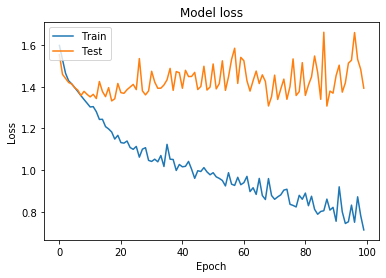

In [135]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [136]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.6666666666666666
Testing Accuracy:  0.5466666674613953


In [137]:
# Classification Report
preds = model.predict_proba(x_test)
classpreds = np.argmax(preds, axis=1)
y_testclass = np.argmax(y_test, axis=1)

classification_results=sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names)
print(sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names))

                precision    recall  f1-score   support

Bronchiectasis       0.60      0.75      0.67         8
          COPD       0.74      0.67      0.70        21
       Healthy       0.40      0.67      0.50        15
     Pneumonia       0.50      0.73      0.59        11
          URTI       0.60      0.15      0.24        20

      accuracy                           0.55        75
     macro avg       0.57      0.59      0.54        75
  weighted avg       0.58      0.55      0.52        75



In [138]:
print(confusion_matrix(y_testclass, classpreds))

[[ 6  0  1  0  1]
 [ 0 14  2  4  1]
 [ 0  2 10  3  0]
 [ 1  1  1  8  0]
 [ 3  2 11  1  3]]


-----


# LSTM 6 Classes (Imbalanced Data) 
## Using Time Features without feature selection

In [141]:
c_names = ['Bronchiectasis', 'Bronchiolitis', 'COPD', 'Healthy', 'Pneumonia', 'URTI']
num_clss = len(c_names)

goal_features=T_features_s
goal_labels=np.array(labels_new)
print(np.shape(goal_features))
print(np.shape(goal_labels))

(3680, 19)
(3680,)


In addition, Ashtma and LTRI should be removed since theier quantity is 4 and 8 pcs and it would not be enough for training and testing Machine Learning methods such as XGB, SVM and LSTM

In [142]:
goal_features= np.delete(goal_features, np.where((goal_labels == 'Asthma') | (goal_labels == 'LRTI'))[0], axis=0) 
goal_labels = np.delete(goal_labels, np.where((goal_labels == 'Asthma') | (goal_labels == 'LRTI'))[0], axis=0)
print(np.shape(goal_features))
print(np.shape(goal_labels))

(3668, 19)
(3668,)


[['Bronchiectasis' 'Bronchiolitis' 'COPD' 'Healthy' 'Pneumonia' 'URTI']
 ['64' '52' '3172' '140' '148' '92']]


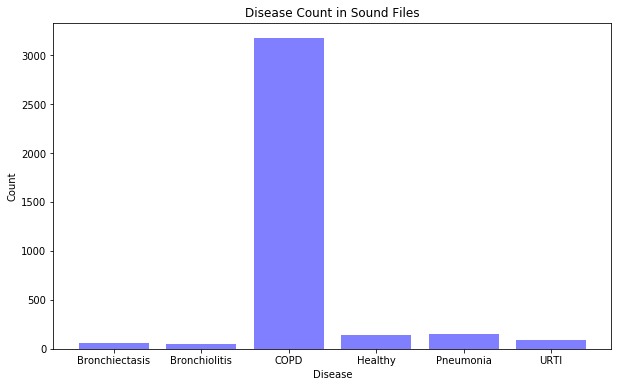

In [143]:
unique_elements, counts_elements = np.unique(goal_labels, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))
#plot the quantity of conditions
y_pos = np.arange(len(unique_elements))
plt.figure(figsize=(10,6))
plt.bar(unique_elements, counts_elements, align='center', alpha=0.5,color='b')
plt.xticks(y_pos, unique_elements)
plt.ylabel('Count')
plt.xlabel('Disease')
plt.title('Disease Count in Sound Files')
plt.show()

In [144]:
#  encode labels for classification
le = LabelEncoder()
i_labels = le.fit_transform(goal_labels)
oh_labels = to_categorical(i_labels)

In [145]:
goal_features1=goal_features
goal_features1=goal_features1.reshape(goal_features1.shape[0],1,goal_features1.shape[1])

x_train, x_test, y_train, y_test = train_test_split(goal_features1 , oh_labels, test_size=0.25, random_state=42)


data_dim = x_train.shape[2]
timesteps = x_train.shape[1]
num_clss = y_train.shape[1]


# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(128, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128))  # return a single vector of dimension 32
model.add(Dense(num_clss, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


history=model.fit(x_train, y_train,
          batch_size=64, epochs=100,
          validation_data=(x_test, y_test))

Train on 2751 samples, validate on 917 samples
Epoch 1/100
2751/2751 [==============================] - 5s 2ms/step - loss: 0.7547 - acc: 0.8561 - val_loss: 0.5764 - val_acc: 0.8637
Epoch 2/100
2751/2751 [==============================] - 0s 180us/step - loss: 0.5580 - acc: 0.8651 - val_loss: 0.5693 - val_acc: 0.8637
Epoch 3/100
2751/2751 [==============================] - 0s 180us/step - loss: 0.5510 - acc: 0.8651 - val_loss: 0.5614 - val_acc: 0.8637
Epoch 4/100
2751/2751 [==============================] - 0s 181us/step - loss: 0.5433 - acc: 0.8651 - val_loss: 0.5594 - val_acc: 0.8637
Epoch 5/100
2751/2751 [==============================] - 0s 181us/step - loss: 0.5397 - acc: 0.8651 - val_loss: 0.5540 - val_acc: 0.8637
Epoch 6/100
2751/2751 [==============================] - 0s 181us/step - loss: 0.5352 - acc: 0.8651 - val_loss: 0.5629 - val_acc: 0.8637
Epoch 7/100
2751/2751 [==============================] - 0s 181us/step - loss: 0.5348 - acc: 0.8651 - val_loss: 0.5560 - val_acc: 0.8

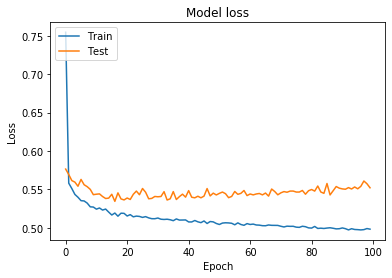

In [146]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [147]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.8684114867754305
Testing Accuracy:  0.8516902946333849


In [148]:
# Classification Report
preds = model.predict_proba(x_test)
classpreds = np.argmax(preds, axis=1)
y_testclass = np.argmax(y_test, axis=1)

classification_results=sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names)
print(sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names))

                precision    recall  f1-score   support

Bronchiectasis       0.00      0.00      0.00        17
 Bronchiolitis       0.00      0.00      0.00        14
          COPD       0.87      0.99      0.92       792
       Healthy       0.00      0.00      0.00        37
     Pneumonia       0.00      0.00      0.00        38
          URTI       0.00      0.00      0.00        19

      accuracy                           0.85       917
     macro avg       0.14      0.16      0.15       917
  weighted avg       0.75      0.85      0.80       917



C:\Users\Setareh Erfani\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [149]:
print(confusion_matrix(y_testclass, classpreds))

[[  0   0  17   0   0   0]
 [  0   0  13   0   1   0]
 [  0   0 781   3   6   2]
 [  0   0  36   0   1   0]
 [  0   0  35   1   0   2]
 [  0   0  19   0   0   0]]


-----

# LSTM 6 Classes (Imbalanced Data)
## Using Time Features with feature selection

In [152]:
goal_features=T_features_s
goal_labels=np.array(labels_new)

goal_features = np.delete(goal_features, np.where((goal_labels == 'Asthma') | (goal_labels == 'LRTI'))[0], axis=0) 
goal_labels = np.delete(goal_labels, np.where((goal_labels == 'Asthma') | (goal_labels == 'LRTI'))[0], axis=0)

[15:30:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


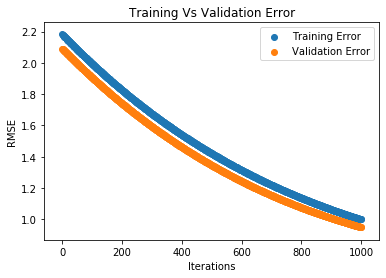

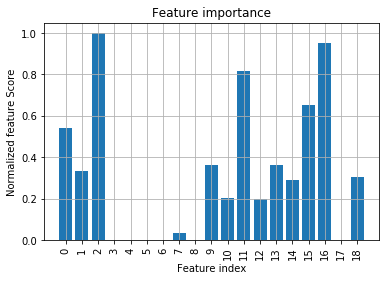

In [153]:
features_score,feature_idx=XGBRgrssr(goal_features,i_labels,.75,.1,1000,.001)

In [154]:
all_feats=pd.DataFrame(goal_features)[feature_idx]
all_feats=all_feats.values


goal_features1=all_feats
goal_features1=goal_features1.reshape(goal_features1.shape[0],1,goal_features1.shape[1])

x_train, x_test, y_train, y_test = train_test_split(goal_features1 , oh_labels, test_size=0.25, random_state=42)


data_dim = x_train.shape[2]
timesteps = x_train.shape[1]
num_clss = y_train.shape[1]


# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(128, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128))  # return a single vector of dimension 32
model.add(Dense(num_clss, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


history=model.fit(x_train, y_train,
          batch_size=64, epochs=100,
          validation_data=(x_test, y_test))

Train on 2751 samples, validate on 917 samples
Epoch 1/100
2751/2751 [==============================] - 5s 2ms/step - loss: 0.7517 - acc: 0.8459 - val_loss: 0.5824 - val_acc: 0.8637
Epoch 2/100
2751/2751 [==============================] - 1s 200us/step - loss: 0.5507 - acc: 0.8651 - val_loss: 0.5712 - val_acc: 0.8637
Epoch 3/100
2751/2751 [==============================] - 1s 198us/step - loss: 0.5458 - acc: 0.8651 - val_loss: 0.5576 - val_acc: 0.8637
Epoch 4/100
2751/2751 [==============================] - 1s 207us/step - loss: 0.5380 - acc: 0.8651 - val_loss: 0.5598 - val_acc: 0.8637
Epoch 5/100
2751/2751 [==============================] - 1s 202us/step - loss: 0.5353 - acc: 0.8651 - val_loss: 0.5528 - val_acc: 0.8637
Epoch 6/100
2751/2751 [==============================] - 1s 201us/step - loss: 0.5317 - acc: 0.8651 - val_loss: 0.5433 - val_acc: 0.8637
Epoch 7/100
2751/2751 [==============================] - 1s 199us/step - loss: 0.5283 - acc: 0.8651 - val_loss: 0.5425 - val_acc: 0.8

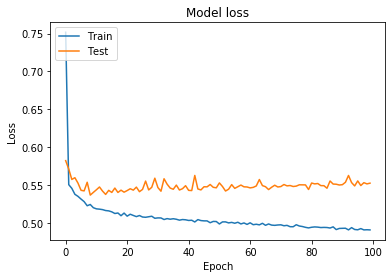

In [155]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [156]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.8676844784148343
Testing Accuracy:  0.8505997820924907


In [157]:
# Classification Report
preds = model.predict_proba(x_test)
classpreds = np.argmax(preds, axis=1)
y_testclass = np.argmax(y_test, axis=1)
classification_results=sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names)
print(sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names))

                precision    recall  f1-score   support

Bronchiectasis       0.00      0.00      0.00        17
 Bronchiolitis       0.00      0.00      0.00        14
          COPD       0.87      0.98      0.92       792
       Healthy       0.00      0.00      0.00        37
     Pneumonia       0.11      0.05      0.07        38
          URTI       0.00      0.00      0.00        19

      accuracy                           0.85       917
     macro avg       0.16      0.17      0.17       917
  weighted avg       0.75      0.85      0.80       917



C:\Users\Setareh Erfani\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [158]:
print(confusion_matrix(y_testclass, classpreds))


[[  0   0  17   0   0   0]
 [  0   0  13   0   1   0]
 [  0   0 778   0  14   0]
 [  0   0  36   0   1   0]
 [  0   0  35   0   2   1]
 [  0   0  19   0   0   0]]


----


# LSTM 6 Classes (Imbalanced Data) 
## Using Sound Features without feature selection

In [161]:
goal_features=S_features_s
goal_labels=np.array(labels_new)
print(np.shape(goal_features))
print(np.shape(goal_labels))

(3680, 1563)
(3680,)


In [162]:
goal_features= np.delete(goal_features, np.where((goal_labels == 'Asthma') | (goal_labels == 'LRTI'))[0], axis=0) 
goal_labels = np.delete(goal_labels, np.where((goal_labels == 'Asthma') | (goal_labels == 'LRTI'))[0], axis=0)
print(np.shape(goal_features))
print(np.shape(goal_labels))

(3668, 1563)
(3668,)


In [163]:
# label encode for classification
le = LabelEncoder()
i_labels = le.fit_transform(goal_labels)
oh_labels = to_categorical(i_labels)

-----

# 6 Classes (Imbalanced Data) 
## Using sound features with feature selection


In [164]:
goal_features=S_features_s
goal_labels=np.array(labels_new)

goal_features = np.delete(goal_features, np.where((goal_labels == 'Asthma') | (goal_labels == 'LRTI'))[0], axis=0) 
goal_labels = np.delete(goal_labels, np.where((goal_labels == 'Asthma') | (goal_labels == 'LRTI'))[0], axis=0)

[15:32:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


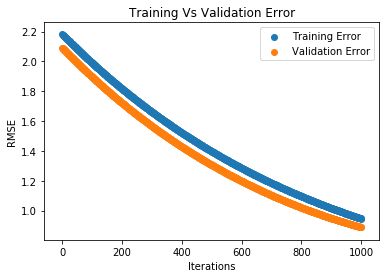

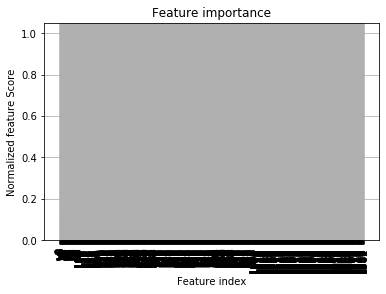

In [165]:
features_score,feature_idx=XGBRgrssr(goal_features,i_labels,.75,.1,1000,.001)

In [166]:
all_feats=pd.DataFrame(goal_features)[feature_idx]
all_feats=all_feats.values


goal_features1=all_feats
goal_features1=goal_features1.reshape(goal_features1.shape[0],1,goal_features1.shape[1])

x_train, x_test, y_train, y_test = train_test_split(goal_features1 , oh_labels, test_size=0.25, random_state=42)


data_dim = x_train.shape[2]
timesteps = x_train.shape[1]
num_clss = y_train.shape[1]


# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(128, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(128))  # return a single vector of dimension 32
model.add(Dense(num_clss, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


history=model.fit(x_train, y_train,
          batch_size=64, epochs=200,
          validation_data=(x_test, y_test))

Train on 2751 samples, validate on 917 samples
Epoch 1/200
2751/2751 [==============================] - 6s 2ms/step - loss: 0.7145 - acc: 0.8444 - val_loss: 0.5194 - val_acc: 0.8637
Epoch 2/200
2751/2751 [==============================] - 1s 222us/step - loss: 0.5053 - acc: 0.8651 - val_loss: 0.4990 - val_acc: 0.8637
Epoch 3/200
2751/2751 [==============================] - 1s 220us/step - loss: 0.4867 - acc: 0.8651 - val_loss: 0.4796 - val_acc: 0.8637
Epoch 4/200
2751/2751 [==============================] - 1s 228us/step - loss: 0.4690 - acc: 0.8651 - val_loss: 0.4549 - val_acc: 0.8637
Epoch 5/200
2751/2751 [==============================] - 1s 222us/step - loss: 0.4496 - acc: 0.8651 - val_loss: 0.4556 - val_acc: 0.8637
Epoch 6/200
2751/2751 [==============================] - 1s 218us/step - loss: 0.4371 - acc: 0.8637 - val_loss: 0.4276 - val_acc: 0.8637
Epoch 7/200
2751/2751 [==============================] - 1s 220us/step - loss: 0.4172 - acc: 0.8622 - val_loss: 0.4147 - val_acc: 0.8

Epoch 60/200
2751/2751 [==============================] - 1s 231us/step - loss: 0.2736 - acc: 0.8931 - val_loss: 0.3127 - val_acc: 0.8888
Epoch 61/200
2751/2751 [==============================] - 1s 220us/step - loss: 0.2651 - acc: 0.8997 - val_loss: 0.3446 - val_acc: 0.8811
Epoch 62/200
2751/2751 [==============================] - 1s 219us/step - loss: 0.2658 - acc: 0.9000 - val_loss: 0.3265 - val_acc: 0.8877
Epoch 63/200
2751/2751 [==============================] - 1s 222us/step - loss: 0.2645 - acc: 0.8917 - val_loss: 0.3493 - val_acc: 0.8779
Epoch 64/200
2751/2751 [==============================] - 1s 218us/step - loss: 0.2735 - acc: 0.8942 - val_loss: 0.3387 - val_acc: 0.8833
Epoch 65/200
2751/2751 [==============================] - 1s 218us/step - loss: 0.2657 - acc: 0.8913 - val_loss: 0.3246 - val_acc: 0.8866
Epoch 66/200
2751/2751 [==============================] - 1s 219us/step - loss: 0.2614 - acc: 0.8942 - val_loss: 0.3413 - val_acc: 0.8866
Epoch 67/200
2751/2751 [==========

2751/2751 [==============================] - 1s 230us/step - loss: 0.1512 - acc: 0.9415 - val_loss: 0.3610 - val_acc: 0.8790
Epoch 179/200
2751/2751 [==============================] - 1s 229us/step - loss: 0.1413 - acc: 0.9447 - val_loss: 0.3601 - val_acc: 0.9008
Epoch 180/200
2751/2751 [==============================] - 1s 212us/step - loss: 0.1451 - acc: 0.9407 - val_loss: 0.3981 - val_acc: 0.8844
Epoch 181/200
2751/2751 [==============================] - 1s 217us/step - loss: 0.1427 - acc: 0.9447 - val_loss: 0.4049 - val_acc: 0.9040
Epoch 182/200
2751/2751 [==============================] - 1s 220us/step - loss: 0.1483 - acc: 0.9375 - val_loss: 0.3628 - val_acc: 0.8953
Epoch 183/200
2751/2751 [==============================] - 1s 215us/step - loss: 0.1384 - acc: 0.9437 - val_loss: 0.4308 - val_acc: 0.8975
Epoch 184/200
2751/2751 [==============================] - 1s 214us/step - loss: 0.1456 - acc: 0.9386 - val_loss: 0.3916 - val_acc: 0.8899
Epoch 185/200
2751/2751 [================

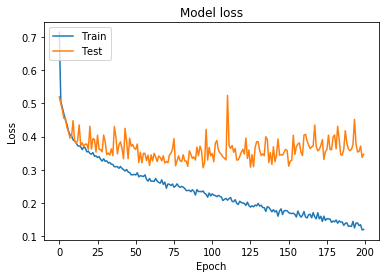

In [167]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [168]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9480189022173755
Testing Accuracy:  0.897491821220943


In [170]:
# Classification Report
preds = model.predict_proba(x_test)
classpreds = np.argmax(preds, axis=1)
y_testclass = np.argmax(y_test, axis=1)
classification_results=sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names)
print(sklearn.metrics.classification_report(y_testclass, classpreds, target_names=c_names))


                precision    recall  f1-score   support

Bronchiectasis       0.68      0.76      0.72        17
 Bronchiolitis       0.54      0.50      0.52        14
          COPD       0.96      0.96      0.96       792
       Healthy       0.54      0.59      0.56        37
     Pneumonia       0.41      0.45      0.43        38
          URTI       0.33      0.26      0.29        19

      accuracy                           0.90       917
     macro avg       0.58      0.59      0.58       917
  weighted avg       0.90      0.90      0.90       917



In [171]:
print(confusion_matrix(y_testclass, classpreds))

[[ 13   1   1   1   1   0]
 [  0   7   1   2   1   3]
 [  6   1 759   8  17   1]
 [  0   2   6  22   4   3]
 [  0   1  16   1  17   3]
 [  0   1   5   7   1   5]]
